In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpack
import scipy.fftpack.realtransforms as realtransforms
# import scipy.fftpack.helper as helper

rate:  48000


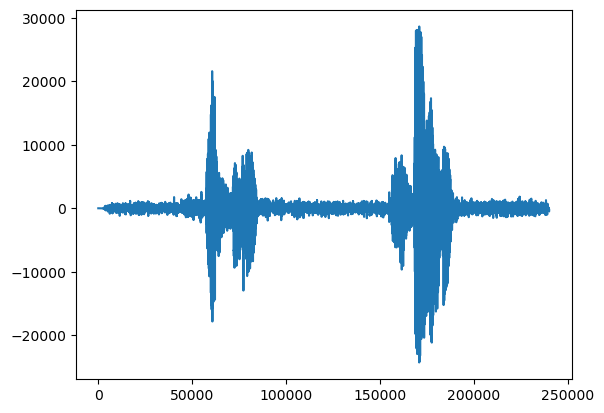

In [52]:
# load wav file
rate, data = wavfile.read('fahri_novaldi.wav')
print('rate: ', rate)

# trim 5 detik pertama
data = data[0:rate*5]

# plot wav spectrum (time domain 5 second)
plt.plot(data[0:rate*5])
plt.show()

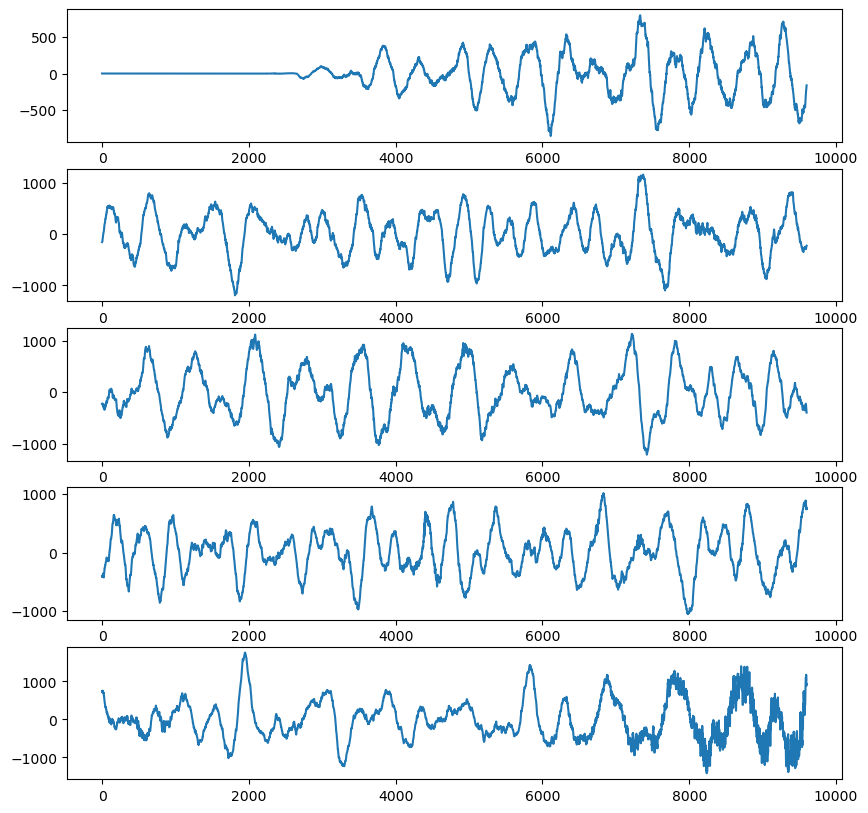

In [53]:
# split audio to 200ms
# 200ms = 0.2s = 0.2*rate
audio_data = []
for i in range(0, len(data), int(0.2*rate)):
    audio_data.append(data[i:i+int(0.2*rate)])


plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(audio_data[i])
plt.show()

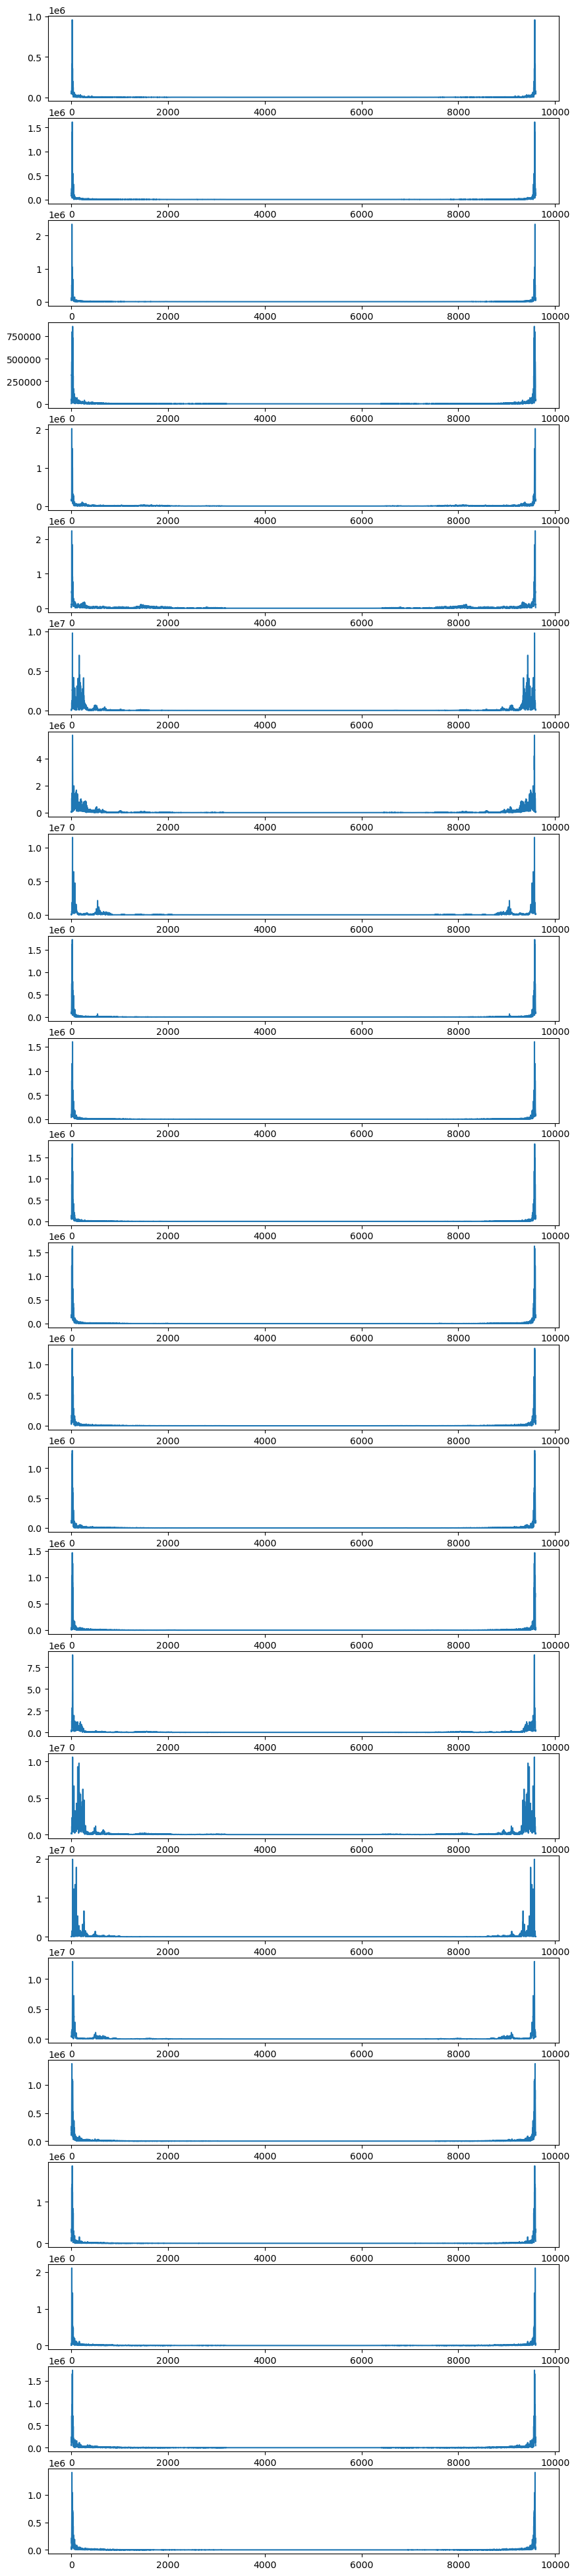

In [54]:
# apply fft 
fft_data = []
for i in range(len(audio_data)):
    fft_data.append(fftpack.fft(audio_data[i]))

# get silence threshold
silence_threshold = np.mean(np.abs(fft_data[0]))

# plot for each fft
plt.figure(figsize=(10,50))
for i in range(len(fft_data)):
    plt.subplot(len(fft_data),1,i+1)
    plt.plot(np.abs(fft_data[i]))

In [55]:
# Function to compute average energy of a signal frame
def compute_average_energy(frame):
    # get energy of each sample
    energy = np.abs(frame) ** 2
    # get count of peaks
    peaks = np.where(energy > 0.01)
    # get average energy
    average_energy = np.sum(energy[peaks]) / len(peaks[0])
    return average_energy

# Function to compute silent ratio of a signal frame
def compute_silent_ratio(frame, threshold):
    # threshold = 0.07  # Adjust this threshold according to your audio input
    silent_samples = np.sum(frame < threshold)
    return silent_samples / len(frame)

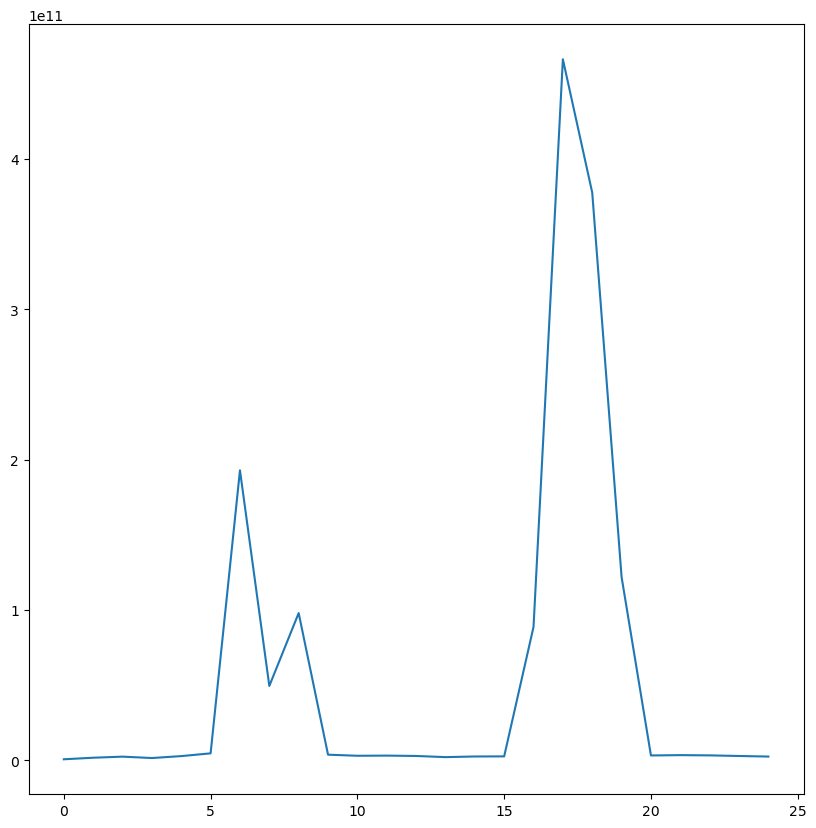

In [56]:
# get average energy of each fft
fft_energy = []
for i in range(len(fft_data)):
    fft_energy.append(compute_average_energy(fft_data[i]))

# plot average energy of first 5 fft_energy
plt.figure(figsize=(10,10))
plt.plot(fft_energy[0:25])

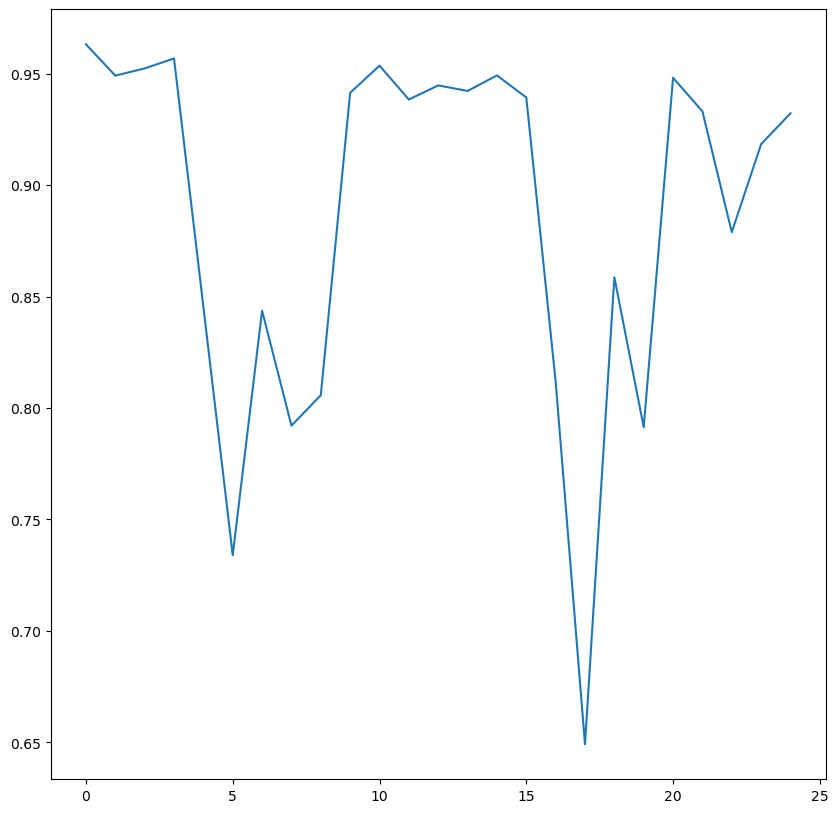

In [57]:
# get silent ratio of each fft
fft_silent_ratio = []
for i in range(len(fft_data)):
    fft_silent_ratio.append(compute_silent_ratio(fft_data[i], silence_threshold))

# plot silent ratio of first 5 fft_silent_ratio
plt.figure(figsize=(10,10))
plt.plot(fft_silent_ratio[0:25])

In [58]:
# combine fft energy & fft silent ratio to data frame
fft_feature = []
for i in range(len(fft_data)):
    fft_feature.append([fft_energy[i], fft_silent_ratio[i]])

# convert to pandas dataframe
import pandas as pd
fft_feature = pd.DataFrame(fft_feature, columns=['energy', 'silent_ratio'])

fft_feature

,energy,silent_ratio
0,6.091870e+08,0.963125
1,1.642961e+09,0.949063
2,2.358447e+09,0.952292
3,1.439996e+09,0.956771
4,2.720026e+09,0.845417
5,4.554910e+09,0.733958
6,1.928512e+11,0.843646
7,4.939242e+10,0.792083
8,9.787137e+10,0.805729
9,3.671406e+09,0.941354


57690040091.32

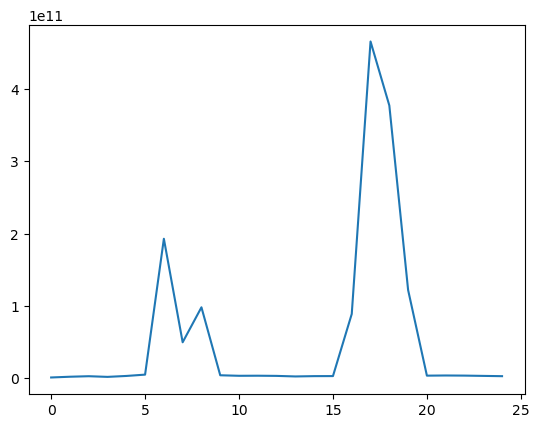

In [59]:
fft_feature['energy'].plot()
# get average
fft_feature['energy'].mean()

0.8868875000000002

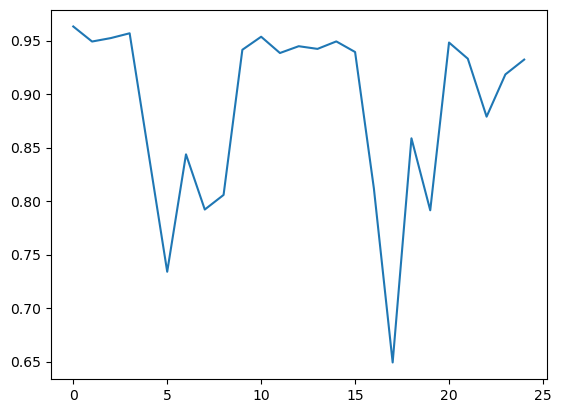

In [60]:
fft_feature['silent_ratio'].plot()
# get average
fft_feature['silent_ratio'].mean()

In [62]:
# speech detection
# get speech index
speech_index = []
for i in range(len(fft_feature)):
    if fft_feature['energy'][i] > fft_feature['energy'].mean() and fft_feature['silent_ratio'][i] < fft_feature['silent_ratio'].mean():
        speech_index.append(i)
    
print("Speech detected at frame : ", speech_index)
print("Speech detected at time : ", np.array(speech_index)*0.2, "s")

Speech detected at frame :  [6, 8, 16, 17, 18, 19]
Speech detected at time :  [1.2 1.6 3.2 3.4 3.6 3.8] s
